# K-Prototypes Clustering for Building Peer Group Analysis

## Problem Framing
The global fight against climate change faces a **critical challenge in the built environment**, which accounts for **34% of global energy-related CO₂ emissions** and **32% of final energy consumption** (UN Environment Programme 2025). As sector emissions continue to rise, partly driven by extreme temperatures increasing demand for space cooling (International Energy Agency 2025), it is urgent to find precise ways to make buildings more energy efficient.

The main goal is to measure building energy efficiency more fairly and accurately, with the ultimate objective of creating meaningful, **data-based archetypes (peer groups)** for understanding energy consumption patterns and identifying problematic buildings. Traditional methods often fall short because they compare buildings using simple, static categories or basic formulas like **Multiple Linear Regression (MLR)**. These methods fail to capture the complex, non-linear factors that truly influence a building's energy use, such as its construction type, age, internal systems, and local climate. Consequently, the comparisons are often inaccurate, making it difficult for policymakers and owners to target their investments effectively (Deepki 2023,). For instance, it is illogical to compare a high-energy laboratory to a parking garage or a tropical facility to a temperate one without adjusting for these variables.

To create genuinely meaningful comparisons, this study proposes an **advanced data-driven solution: unsupervised clustering**.

**Methodology:**

1\. **Moving Beyond Bias:** Instead of relying on predefined labels, this approach uses **unsupervised clustering** to allow **"true" peer groups** to emerge naturally from the data, identifying groups of buildings with similar characteristics and energy profiles (Amasyali & El-Gohary 2018). This technique generates **representative building archetypes** to define typical buildings within the overall stock (Deepki 2023,.

2\. **Handling Complex Data:** The chosen tool is the **K-Prototypes algorithm**, which is ideal for the building sector because it can **simultaneously process categorical data** (like usage type or region) **and numerical data** (like size, age, or temperature) (Alrasheed & Mourshed 2024). This capacity to handle mixed data types is crucial for capturing the heterogeneous nature of the building sector.

3\. **Targeted Impact:** By analyzing **Energy Use Intensity (kWh/sqm)** within these defined peer groups, the methodology ensures that benchmarking is done against the most relevant comparison objects, not a vague industry average. This dramatically improves the ability to **identify "efficiency outliers"**---buildings performing significantly worse than their true peers---which allows policymakers and owners to **prioritize highly effective, targeted interventions** (Deepki 2023).

In summary, adopting clustering techniques like K-Prototypes is essential for developing accurate, representative models that address the inherent complexity of diverse building stock (Alrasheed & Mourshed, 2024). This methodological shift from simplified, traditional comparisons to data-informed peer grouping provides a robust framework for identifying energy inefficiencies (Amasyali & El-Gohary, 2018). By pinpointing efficiency outliers within specific archetypes, these insights directly facilitate evidence-based decision-making. This approach is necessary to accelerate targeted investment in the most impactful energy retrofits, leading to quantifiable decarbonization gains and helping the buildings sector meet urgent global climate goals (IEA, 2025; UNEP, 2025).

---
References

Alrasheed, M., & Mourshed, M. (2024). Building stock modelling using k-prototype algorithm: A framework for representative archetype development. *Energy and Buildings*, 311, 114111.

Amasyali, K., & El-Gohary, N. M. (2018). A review of data-driven building energy consumption prediction studies. *Renewable and Sustainable Energy Reviews*, 81, 1192--1205.

Ciulla, G., & D'Amico, A. (2019). Building energy performance forecasting: A multiple linear regression approach. *Applied Energy*, 253, 113500.

Deepki. (2023, November 29). *6 reasons why building archetype clustering can level up your ESG strategy*. [Blog post].

Huang, Z. (1997). Clustering large data sets with mixed numeric and categorical values. *Proceedings of the 1st Pacific-Asia Conference on Knowledge Discovery and Data Mining*, 21--34.

Huang, Z. (1998). Extensions to the k-means algorithm for clustering large data sets with categorical values. *Data Mining and Knowledge Discovery*, 2(3), 283--304.

International Energy Agency. (2023a). *Tracking Clean Energy Progress: Space Cooling*.

International Energy Agency. (2025). *Global Energy Review 2025: CO2 emissions and energy efficiency*.

Olu-Ajayi, R., Alaka, H., Owolabi, H., Akanbi, L., & Ganiyu, S. (2023). Data-Driven Tools for Building Energy Consumption Prediction: A Review. *Energies*, 16(6), 2574.

UN Environment Programme. (2025). *Global status report for buildings and construction 2024/2025: Not just another brick in the wall*.

---

**Research question:** Can we create meaningful peer groups for buildings with mixed data types (categorical building characteristics + numerical features)?

**Method:** K-Prototypes clustering—an algorithm that handles both categorical and numerical data simultaneously—to create building peer groups based on characteristics, then analyze energy performance *within* each peer group.

**Use energy use intensity (khW/sqm)* to:
1. Analyze energy intensity variation *within* each peer group
2. Enable fair benchmarking by comparing buildings to true peers
3. Identify efficiency outliers relative to similar buildings

---

## Variable Definitions

| Variable | Description | Type | Units/Values |
|----------|-------------|------|--------------|
| `primaryspaceusage` | Primary function of the building | Categorical | Education, Office, Parking, etc. |
| `region` | Geographic location of the building | Categorical | City/region names |
| `meter` | Type of energy meter | Categorical | electricity, chilledwater, gas, etc. |
| `yearbuilt` | Year the building was constructed | Numerical | Year (e.g., 1975) |
| `Avg_AirTemp_Annual` | Average annual air temperature at location | Numerical | °C |
| `log_sqm` | Log-transformed building floor area | Numerical | log(m²) |
| `log_eui` | Log-transformed Energy Use Intensity | Numerical | log(kWh/m²/year) |


<!-- # | `efficiency_status` | Performance relative to cluster peers | Categorical | Top Performer, Average, Underperformer |
# | `eui_zscore` | Z-score of EUI within cluster | Numerical | Standard deviations from cluster mean | -->

### Clustering Features vs. Analysis Features

| Feature Type | Variables | Purpose |
|--------------|-----------|---------|
| **Clustering Features** | `primaryspaceusage`, `region`, `meter`, `yearbuilt`, `Avg_AirTemp_Annual`, `log_sqm` | Used to form peer groups |
| **Analysis Features** | `log_eui` | Analyzed *within* peer groups (NOT used for clustering) |

---

## Data Source

- **Dataset:** BDG2 (Building Data Genome 2)
- **Buildings:** Non-residential buildings from various regions
- **Time Period:** Annual energy data from 2016 and 2017

---
## 1. Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes

import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [3]:
# Load the analysis dataset
path = "../data/"
df = pd.read_csv(path + "df_analysis.csv")

# Load building metadata with sqm
df_meta = pd.read_csv(path + "metadata_analysis.csv")

print(f"Analysis dataset shape: {df.shape}")
print(f"Metadata dataset shape: {df_meta.shape}")
df.head()

Analysis dataset shape: (5902, 11)
Metadata dataset shape: (1636, 7)


,Avg_AirTemp_Annual,year,meter,site_id,region,country,yearbuilt,primaryspaceusage,total_meter_reading,eui,log_eui
0,15.237956,2016,electricity,Bear,"Berkeley, California",United States of America,1933.0,Entertainment/public assembly,3.020396e+06,136.564438,4.924092
1,14.965894,2017,electricity,Bear,"Berkeley, California",United States of America,1933.0,Entertainment/public assembly,4.115350e+06,186.071809,5.231493
2,15.237956,2016,electricity,Bear,"Berkeley, California",United States of America,1958.0,Entertainment/public assembly,3.868207e+05,138.051652,4.934845
3,14.965894,2017,electricity,Bear,"Berkeley, California",United States of America,1958.0,Entertainment/public assembly,3.652301e+05,130.346201,4.877837
4,15.237956,2016,electricity,Bear,"Berkeley, California",United States of America,2016.0,Entertainment/public assembly,5.612824e+05,73.080796,4.305156


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109303 entries, 0 to 109302
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Avg_AirTemp_Annual   109303 non-null  float64
 1   year                 109303 non-null  int64  
 2   meter                109303 non-null  object 
 3   site_id              109303 non-null  object 
 4   region               88736 non-null   object 
 5   country              88736 non-null   object 
 6   yearbuilt            13885 non-null   float64
 7   primaryspaceusage    109242 non-null  object 
 8   total_meter_reading  109303 non-null  float64
 9   eui                  109303 non-null  float64
 10  log_eui              109303 non-null  float64
 11  sqm                  109303 non-null  float64
 12  log_sqm              109303 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 10.8+ MB


In [4]:
# Preview metadata with building size (sqm)
print("Metadata columns:", df_meta.columns.tolist())
print(f"\nBuilding size (sqm) summary:")
print(f"  Min: {df_meta['sqm'].min():,.1f} m²")
print(f"  Max: {df_meta['sqm'].max():,.1f} m²")
print(f"  Median: {df_meta['sqm'].median():,.1f} m²")
df_meta.head()

Metadata columns: ['building_id', 'site_id', 'sqm', 'primaryspaceusage', 'yearbuilt', 'region', 'country']

Building size (sqm) summary:
  Min: 26.3 m²
  Max: 81,290.1 m²
  Median: 5,074.4 m²


,building_id,site_id,sqm,primaryspaceusage,yearbuilt,region,country
0,Panther_lodging_Dean,Panther,508.8,Lodging/residential,1989.0,"Orlando, Florida",United States of America
1,Panther_lodging_Shelia,Panther,929.0,Lodging/residential,1992.0,"Orlando, Florida",United States of America
2,Panther_lodging_Ricky,Panther,483.1,Lodging/residential,2016.0,"Orlando, Florida",United States of America
3,Panther_education_Rosalie,Panther,690.5,Education,2008.0,"Orlando, Florida",United States of America
4,Panther_education_Misty,Panther,252.7,Education,2004.0,"Orlando, Florida",United States of America


---
## 2. Data Preparation

K-Prototypes requires:
- Numerical features to be scaled
- Categorical features as strings or integers
- No missing values

**Important:** We intentionally **exclude EUI from clustering** to create peer groups based on building characteristics only. This allows us to:
1. Group similar buildings together (same type, climate, meter, age, **size**)
2. Then analyze how EUI varies *within* each peer group
3. Identify efficiency outliers by comparing to cluster peers

**Building size (`sqm`)** is based on building metadata (`metadata_analysis.csv`).

In [ ]:
# Merge analysis data with metadata to get building size (sqm)
# Join on common columns: site_id, primaryspaceusage, yearbuilt, region
merge_cols = ['site_id', 'primaryspaceusage', 'yearbuilt', 'region']

df = df.merge(
    df_meta[['site_id', 'primaryspaceusage', 'yearbuilt', 'region', 'sqm']],
    on=merge_cols,
    how='left'
)

print(f"After merge: {df.shape}")
print(f"Rows with sqm data: {df['sqm'].notna().sum()}")
print(f"Rows missing sqm: {df['sqm'].isna().sum()}")

# Log-transform building size for better distribution
df['log_sqm'] = np.log(df['sqm'])

# Define features for clustering
# NOTE: log_eui is excluded from clustering features to create peer groups
# based on building characteristics, then analyze EUI within each cluster
cat_features = ['primaryspaceusage', 'region', 'meter']

# Building size from metadata (not derived from energy data)
num_features = ['yearbuilt', 'Avg_AirTemp_Annual', 'log_sqm']

# Select relevant columns (including log_eui for later analysis, but not for clustering)
df_cluster = df[cat_features + num_features + ['log_eui']].copy()

# Check missing values
print("\nMissing values before cleaning:")
print(df_cluster.isnull().sum())

# Drop rows with missing values
df_cluster = df_cluster.dropna()
print(f"\nRows after dropping missing values: {len(df_cluster)}")

# Show building size distribution
print(f"\nBuilding size (sqm) summary:")
print(f"  Min: {np.exp(df_cluster['log_sqm'].min()):,.0f} m²")
print(f"  Max: {np.exp(df_cluster['log_sqm'].max()):,.0f} m²")
print(f"  Median: {np.exp(df_cluster['log_sqm'].median()):,.0f} m²")

After merge: (109303, 12)
Rows with sqm data: 109303
Rows missing sqm: 0

Missing values before cleaning:
primaryspaceusage        61
region                20567
meter                     0
yearbuilt             95418
Avg_AirTemp_Annual        0
log_sqm                   0
log_eui                   0
dtype: int64

Rows after dropping missing values: 13824

Building size (sqm) summary:
  Min: 26 m²
  Max: 79,000 m²
  Median: 2,692 m²


In [27]:
df_cluster.head()

,primaryspaceusage,region,meter,yearbuilt,Avg_AirTemp_Annual,log_sqm,log_eui,Cluster
0,Entertainment/public assembly,"Berkeley, California",electricity,-1.591984,0.498199,2.061575,4.924092,0
1,Entertainment/public assembly,"Berkeley, California",electricity,-1.591984,0.438370,2.061575,5.231493,0
2,Entertainment/public assembly,"Berkeley, California",electricity,-0.471095,0.498199,-0.071641,4.934845,3
3,Entertainment/public assembly,"Berkeley, California",electricity,-0.471095,0.438370,-0.071641,4.877837,3
4,Entertainment/public assembly,"Berkeley, California",electricity,2.129369,0.498199,0.969483,4.305156,1


In [29]:
df_cluster.isna().sum()

primaryspaceusage     0
region                0
meter                 0
yearbuilt             0
Avg_AirTemp_Annual    0
log_sqm               0
log_eui               0
Cluster               0
dtype: int64

In [30]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13824 entries, 0 to 107369
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primaryspaceusage   13824 non-null  object 
 1   region              13824 non-null  object 
 2   meter               13824 non-null  object 
 3   yearbuilt           13824 non-null  float64
 4   Avg_AirTemp_Annual  13824 non-null  float64
 5   log_sqm             13824 non-null  float64
 6   log_eui             13824 non-null  float64
 7   Cluster             13824 non-null  uint16 
dtypes: float64(4), object(3), uint16(1)
memory usage: 891.0+ KB


In [6]:
# Scale numerical features (only clustering features, not log_eui)
scaler = StandardScaler()
df_cluster[num_features] = scaler.fit_transform(df_cluster[num_features])

print("Numerical features scaled (mean=0, std=1).")
print("Note: log_eui is NOT scaled - it will be analyzed within clusters, not used for clustering.")
df_cluster.describe()

Numerical features scaled (mean=0, std=1).
Note: log_eui is NOT scaled - it will be analyzed within clusters, not used for clustering.


,yearbuilt,Avg_AirTemp_Annual,log_sqm,log_eui
count,1.382400e+04,1.382400e+04,1.382400e+04,13824.000000
mean,3.355341e-15,-1.151342e-16,-4.194176e-16,3.997900
std,1.000036e+00,1.000036e+00,1.000036e+00,1.460919
min,-3.071558e+00,-1.196566e+00,-4.892016e+00,0.000000
25%,-1.124100e-01,-4.668034e-01,-7.647364e-01,3.277152
50%,3.359458e-01,-4.040861e-01,-1.129923e-01,3.923815
75%,3.359458e-01,-4.040861e-01,7.369380e-01,4.577879
max,2.174205e+00,2.690927e+00,3.376093e+00,11.846613


In [7]:
# Prepare data for K-Prototypes
# K-Prototypes expects a numpy array with categorical columns identified by index

# Reorder columns: numerical first, then categorical
feature_order = num_features + cat_features
df_kproto = df_cluster[feature_order]

# Convert to numpy array
X = df_kproto.values

# Identify categorical column indices (they are at the end)
cat_indices = list(range(len(num_features), len(feature_order)))

print(f"Data shape: {X.shape}")
print(f"Categorical column indices: {cat_indices}")
print(f"Feature order: {feature_order}")

Data shape: (13824, 6)
Categorical column indices: [3, 4, 5]
Feature order: ['yearbuilt', 'Avg_AirTemp_Annual', 'log_sqm', 'primaryspaceusage', 'region', 'meter']


---
## 3. Determining Optimal Number of Clusters

The elbow method helps identify the optimal number of clusters by plotting the cost (sum of distances) against the number of clusters.

Running K-Prototypes for different values of k...
  k=2: cost = 32900.90
  k=2: cost = 32900.90
  k=3: cost = 24406.47
  k=3: cost = 24406.47
  k=4: cost = 17835.09
  k=4: cost = 17835.09
  k=5: cost = 15824.30
  k=5: cost = 15824.30
  k=6: cost = 14182.57
  k=6: cost = 14182.57
  k=7: cost = 13001.39
  k=7: cost = 13001.39
  k=8: cost = 12004.01
  k=8: cost = 12004.01
  k=9: cost = 11423.67
  k=9: cost = 11423.67
  k=10: cost = 10667.98
  k=10: cost = 10667.98


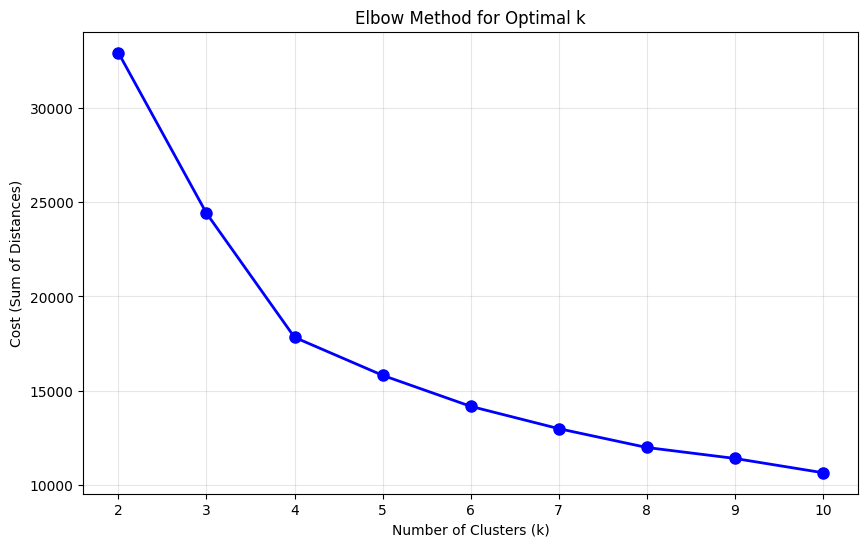

In [8]:
# Elbow method to find optimal k
costs = []
K_range = range(2, 11)

print("Running K-Prototypes for different values of k...")
for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_jobs=-1)
    kproto.fit(X, categorical=cat_indices)
    costs.append(kproto.cost_)
    print(f"  k={k}: cost = {kproto.cost_:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, costs, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Sum of Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.show()

---
## 4. Fit K-Prototypes Model

Based on the elbow plot, select an appropriate number of clusters. A common choice is where the curve starts to flatten (the "elbow").

In [9]:
# Select number of clusters based on elbow analysis
n_clusters = 5  # Adjust based on elbow plot

# Fit final model
print(f"Fitting K-Prototypes with k={n_clusters}...")
kproto_final = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=42, n_jobs=-1)
clusters = kproto_final.fit_predict(X, categorical=cat_indices)

# Add cluster labels to dataframe
df_cluster['Cluster'] = clusters

print(f"\nCluster distribution:")
print(df_cluster['Cluster'].value_counts().sort_index())

Fitting K-Prototypes with k=5...

Cluster distribution:
Cluster
0    2976
1    1362
2     742
3    7035
4    1709
Name: count, dtype: int64

Cluster distribution:
Cluster
0    2976
1    1362
2     742
3    7035
4    1709
Name: count, dtype: int64


---
## 5. Cluster Analysis

In [10]:
# Cluster centroids analysis
print("Cluster Centroids Analysis:")
print("="*70)

# The centroids structure: list of arrays, one per cluster
# Each cluster array contains [numerical_values..., categorical_values...]
centroids = kproto_final.cluster_centroids_
print(f"\nNumber of clusters: {len(centroids)}")
print(f"Features per cluster: {len(centroids[0])}")

# Build centroids DataFrame - each row is a cluster
all_features = num_features + cat_features
centroids_df = pd.DataFrame(
    centroids,
    columns=all_features,
    index=[f"Cluster {i}" for i in range(n_clusters)]
)

# Display numerical centroids (scaled values)
print("\n" + "-"*70)
print("Numerical Feature Centroids (scaled values):")
print("-"*70)
print(centroids_df[num_features].round(3))

# Display categorical centroids (modes)
print("\n" + "-"*70)
print("Categorical Feature Modes (most common value per cluster):")
print("-"*70)
print(centroids_df[cat_features])

Cluster Centroids Analysis:

Number of clusters: 5
Features per cluster: 6

----------------------------------------------------------------------
Numerical Feature Centroids (scaled values):
----------------------------------------------------------------------
                      yearbuilt    Avg_AirTemp_Annual               log_sqm
Cluster 0  0.033305597756872404  -0.38111973545252964    1.2001948510393932
Cluster 1    1.0900855137797687    2.2250391115758585    1.1093416082896694
Cluster 2    0.7103410015409912     2.249732294864065   -0.9576006914037412
Cluster 3   0.23326687269531815   -0.4344797291070037   -0.5803756280581643
Cluster 4   -2.1953887660898355   -0.2978510273735377  -0.16923399109013912

----------------------------------------------------------------------
Categorical Feature Modes (most common value per cluster):
----------------------------------------------------------------------
             primaryspaceusage                  region        meter
Cluster 0  

In [11]:
# Unscale numerical centroids for interpretation
# Extract numerical features from centroids (first len(num_features) columns)
num_centroids_scaled = centroids_df[num_features].values.astype(float)

num_centroids_unscaled = pd.DataFrame(
    scaler.inverse_transform(num_centroids_scaled),
    columns=num_features,
    index=[f"Cluster {i}" for i in range(n_clusters)]
)

print("Numerical feature centroids (original scale):")
print(num_centroids_unscaled.round(2))

Numerical feature centroids (original scale):
           yearbuilt  Avg_AirTemp_Annual  log_sqm
Cluster 0    1969.25               11.24     9.17
Cluster 1    1992.82               23.09     9.08
Cluster 2    1984.35               23.20     7.08
Cluster 3    1973.71               11.00     7.45
Cluster 4    1919.54               11.62     7.84


In [12]:
# Combine centroids for summary table
cat_centroids_unscaled = centroids_df[cat_features]
cluster_summary = pd.concat([num_centroids_unscaled, cat_centroids_unscaled], axis=1)
cluster_summary['Count'] = df_cluster['Cluster'].value_counts().sort_index().values
cluster_summary['Pct'] = (cluster_summary['Count'] / len(df_cluster) * 100).round(1)

print("\n" + "="*90)
print("CLUSTER SUMMARY")
print("="*90)
print(cluster_summary.to_string())


CLUSTER SUMMARY
             yearbuilt  Avg_AirTemp_Annual   log_sqm    primaryspaceusage                  region        meter  Count   Pct
Cluster 0  1969.250000           11.239422  9.169858            Education  Cardiff, Cymru / Wales  electricity   2976  21.5
Cluster 1  1992.820117           23.090425  9.081866            Education        Orlando, Florida  electricity   1362   9.9
Cluster 2  1984.350404           23.202713  7.080039  Lodging/residential        Orlando, Florida  electricity    742   5.4
Cluster 3  1973.709879           10.996778  7.445380            Education  Cardiff, Cymru / Wales  electricity   7035  50.9
Cluster 4  1919.541837           11.618070  7.843570            Education  Cardiff, Cymru / Wales  electricity   1709  12.4


---
## 6. Cluster Visualization

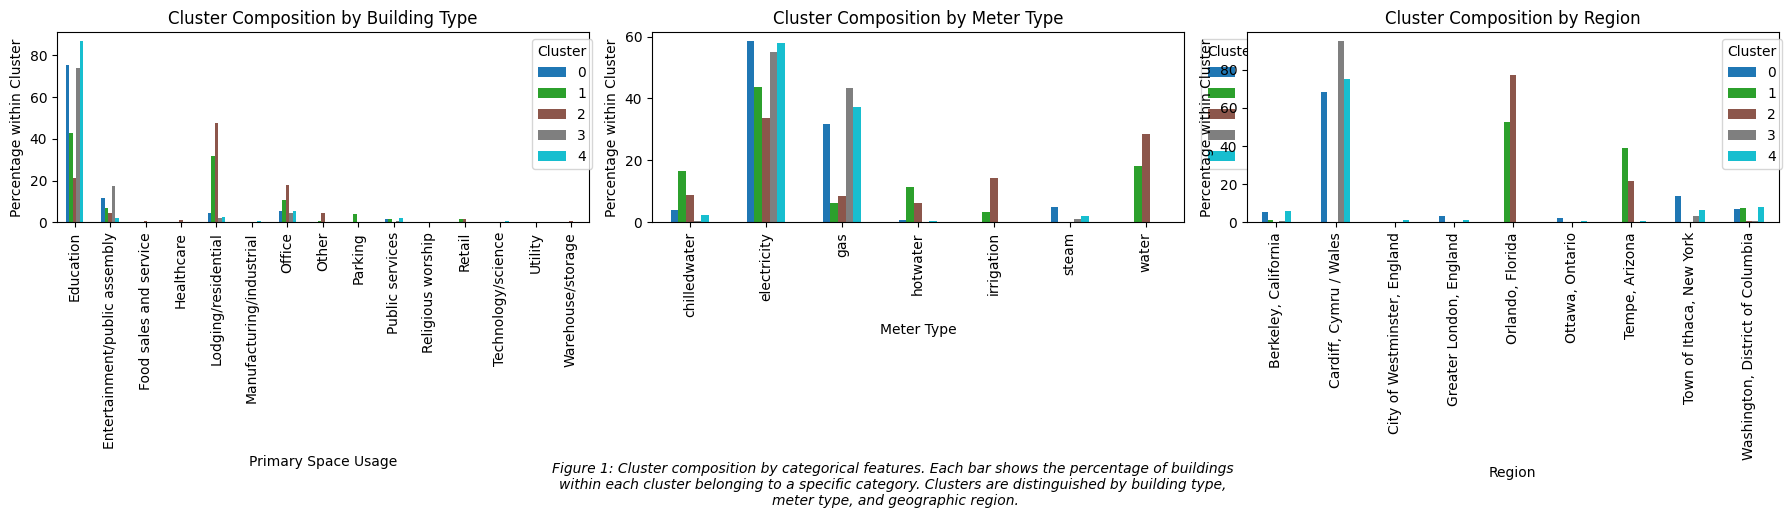

In [13]:
# Restore original scale for visualization (only the scaled features)
df_viz = df_cluster.copy()
df_viz[num_features] = scaler.inverse_transform(df_cluster[num_features])

# Distribution of clusters by building type
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# By primaryspaceusage
ct1 = pd.crosstab(df_viz['primaryspaceusage'], df_viz['Cluster'], normalize='columns') * 100
ct1.plot(kind='bar', ax=axes[0], colormap='tab10')
axes[0].set_title('Cluster Composition by Building Type')
axes[0].set_xlabel('Primary Space Usage')
axes[0].set_ylabel('Percentage within Cluster')
axes[0].legend(title='Cluster', bbox_to_anchor=(1.02, 1))
axes[0].tick_params(axis='x', rotation=90)

# By meter type
ct2 = pd.crosstab(df_viz['meter'], df_viz['Cluster'], normalize='columns') * 100
ct2.plot(kind='bar', ax=axes[1], colormap='tab10')
axes[1].set_title('Cluster Composition by Meter Type')
axes[1].set_xlabel('Meter Type')
axes[1].set_ylabel('Percentage within Cluster')
axes[1].legend(title='Cluster', bbox_to_anchor=(1.02, 1))
axes[1].tick_params(axis='x', rotation=90)

# By region
ct3 = pd.crosstab(df_viz['region'], df_viz['Cluster'], normalize='columns') * 100
ct3.plot(kind='bar', ax=axes[2], colormap='tab10')
axes[2].set_title('Cluster Composition by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Percentage within Cluster')
axes[2].legend(title='Cluster', bbox_to_anchor=(1.02, 1))
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()

# Add figure caption
fig.text(0.5, -0.02, 
         'Figure 1: Cluster composition by categorical features. Each bar shows the percentage of buildings \n'
         'within each cluster belonging to a specific category. Clusters are distinguished by building type, \n'
         'meter type, and geographic region.',
         ha='center', fontsize=10, style='italic')

plt.show()

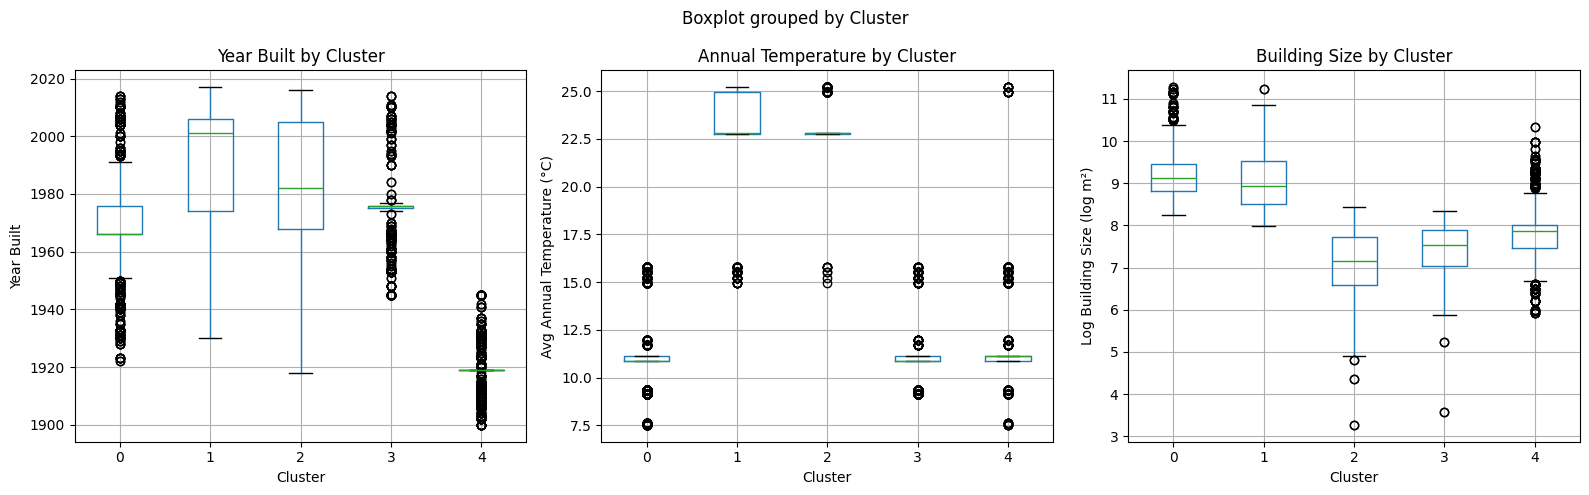

In [14]:
# Numerical feature distributions by cluster
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Year built by cluster
df_viz.boxplot(column='yearbuilt', by='Cluster', ax=axes[0])
axes[0].set_title('Year Built by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Year Built')
plt.suptitle('')  # Remove automatic title

# Temperature by cluster
df_viz.boxplot(column='Avg_AirTemp_Annual', by='Cluster', ax=axes[1])
axes[1].set_title('Annual Temperature by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Avg Annual Temperature (°C)')

# Building size by cluster
df_viz.boxplot(column='log_sqm', by='Cluster', ax=axes[2])
axes[2].set_title('Building Size by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Log Building Size (log m²)')

plt.tight_layout()
plt.show()

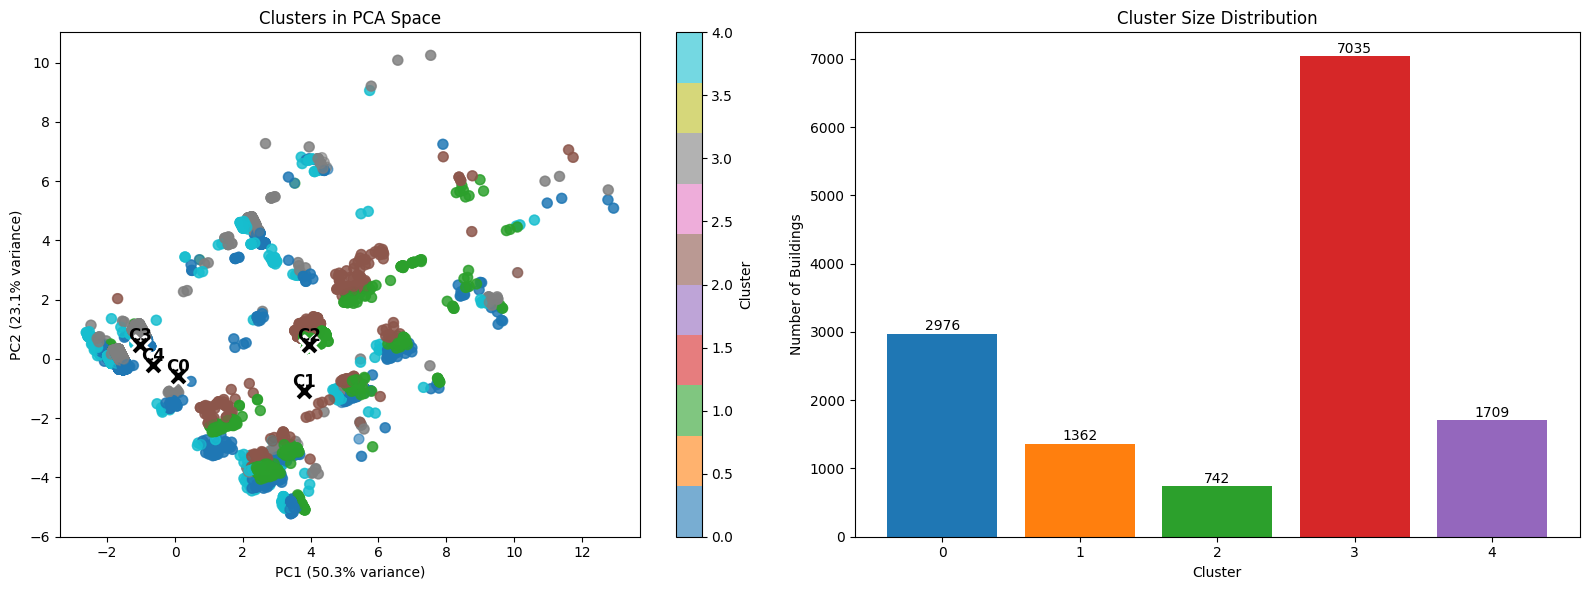


PCA Explained Variance: 73.4% (2 components)


In [15]:
# Advanced Cluster Visualization using PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Prepare data for PCA visualization
# Encode categorical variables for PCA
df_encoded = df_cluster.copy()
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Combine numerical and encoded categorical features
X_for_pca = df_encoded[num_features + cat_features].values

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_for_pca)

# Create scatter plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters in PCA space
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster['Cluster'], 
                          cmap='tab10', alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[0].set_title('Clusters in PCA Space')
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Cluster')

# Add cluster centroids to PCA plot
centroids_pca = []
for i in range(n_clusters):
    cluster_mask = df_cluster['Cluster'] == i
    centroid_pca = X_pca[cluster_mask].mean(axis=0)
    centroids_pca.append(centroid_pca)
    axes[0].scatter(centroid_pca[0], centroid_pca[1], c='black', marker='X', 
                   s=200, edgecolors='white', linewidths=2)
    axes[0].annotate(f'C{i}', (centroid_pca[0], centroid_pca[1]), 
                    fontsize=12, fontweight='bold', ha='center', va='bottom')

# Plot 2: Cluster sizes
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
colors = plt.cm.tab10(range(n_clusters))
bars = axes[1].bar(cluster_counts.index, cluster_counts.values, color=colors)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Buildings')
axes[1].set_title('Cluster Size Distribution')
axes[1].set_xticks(range(n_clusters))

# Add value labels on bars
for bar, count in zip(bars, cluster_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nPCA Explained Variance: {pca.explained_variance_ratio_.sum()*100:.1f}% (2 components)")

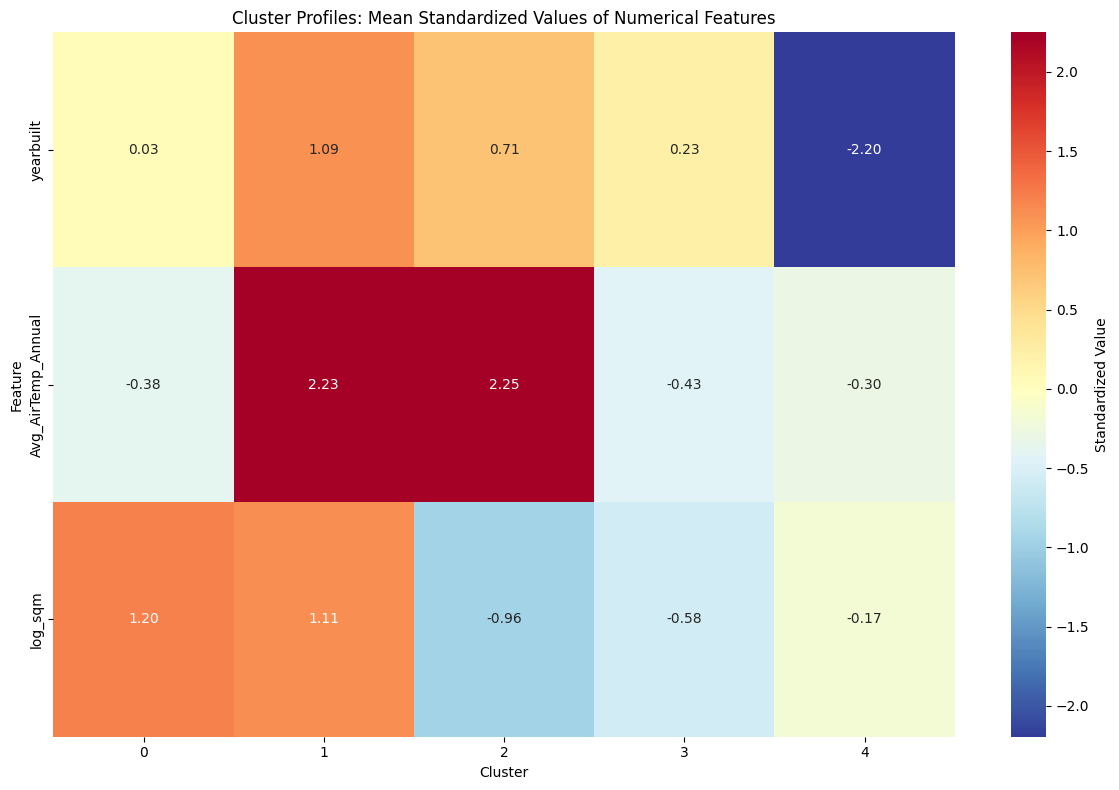

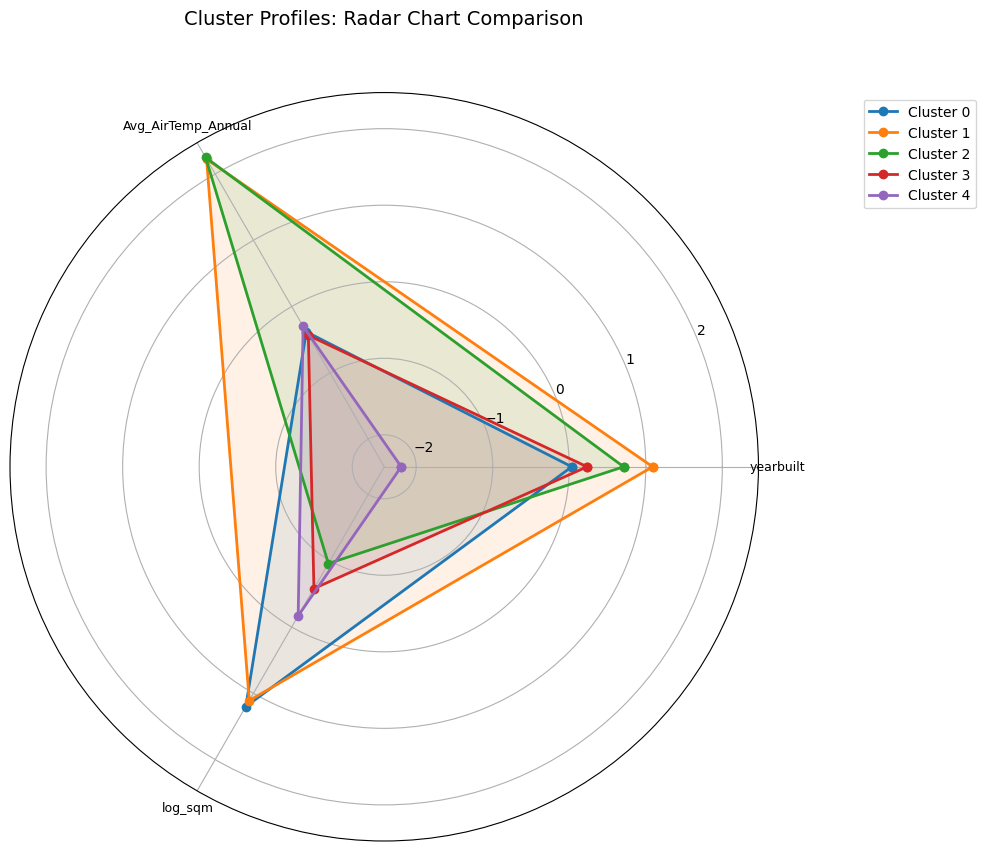

In [16]:
# Heatmap of cluster characteristics
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate mean values for numerical features per cluster (scaled values)
cluster_profiles = df_cluster.groupby('Cluster')[num_features].mean()

# Create heatmap
sns.heatmap(cluster_profiles.T, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, ax=ax, cbar_kws={'label': 'Standardized Value'})
ax.set_title('Cluster Profiles: Mean Standardized Values of Numerical Features')
ax.set_xlabel('Cluster')
ax.set_ylabel('Feature')

plt.tight_layout()
plt.show()

# Radar/Spider chart for cluster comparison
from math import pi

# Prepare data for radar chart
categories = num_features
N = len(categories)

# Create angle for each feature
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = plt.cm.tab10(range(n_clusters))
for i in range(n_clusters):
    values = cluster_profiles.loc[i].values.flatten().tolist()
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=9)
ax.set_title('Cluster Profiles: Radar Chart Comparison', size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

### Heatmap Interpretation

The heatmap displays the **mean standardized values of numerical features for each cluster**.

**How to read it:**
- **Rows**: The three numerical clustering features (`yearbuilt`, `Avg_AirTemp_Annual`, `log_sqm`)
- **Columns**: Each cluster (0, 1, 2, 3, 4)
- **Colors**: 
  - **Red/warm colors** = values **above** the overall mean (positive z-scores)
  - **Blue/cool colors** = values **below** the overall mean (negative z-scores)
  - **White/neutral** = close to the overall mean (near zero)

**What each feature tells you about a cluster:**
| Feature | Negative (Blue) | Positive (Red) |
|---------|-----------------|----------------|
| `yearbuilt` | Older buildings | Newer buildings |
| `Avg_AirTemp_Annual` | Cooler climates | Warmer climates |
| `log_sqm` | Smaller buildings | Larger buildings |

This visualization provides a quick summary of what makes each cluster distinct in terms of numerical characteristics.

---
## 7. EUI Analysis Within Clusters

Since clustering is based on building characteristics only (excluding EUI), we can now analyze how energy intensity varies **within** each peer group. This is the key benefit of this approach for benchmarking.

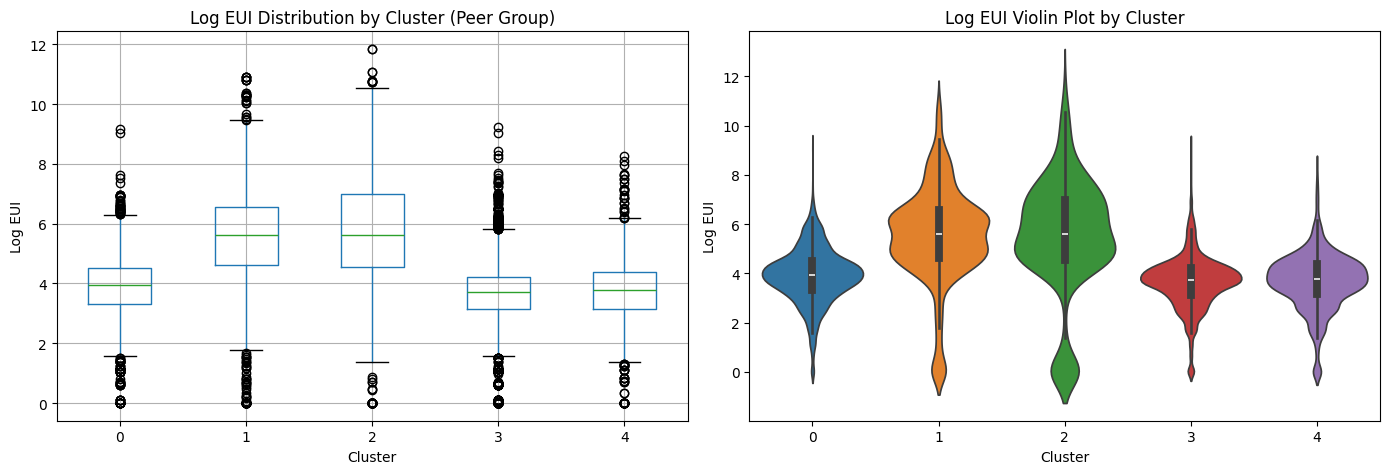


EUI STATISTICS WITHIN EACH CLUSTER (PEER GROUP)
         Count  Mean   Std  Min  Median    Max
Cluster                                       
0         2976  3.92  1.11  0.0    3.95   9.16
1         1362  5.54  1.96  0.0    5.61  10.90
2          742  5.52  2.37  0.0    5.61  11.85
3         7035  3.65  1.07  0.0    3.72   9.22
4         1709  3.68  1.17  0.0    3.77   8.25


In [17]:
# EUI distribution within each cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot of EUI by cluster
df_viz.boxplot(column='log_eui', by='Cluster', ax=axes[0])
axes[0].set_title('Log EUI Distribution by Cluster (Peer Group)')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Log EUI')
plt.suptitle('')

# Violin plot for more detail
import seaborn as sns
sns.violinplot(data=df_viz, x='Cluster', y='log_eui', ax=axes[1], palette='tab10')
axes[1].set_title('Log EUI Violin Plot by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Log EUI')

plt.tight_layout()
plt.show()

# Summary statistics of EUI within each cluster
print("\n" + "="*80)
print("EUI STATISTICS WITHIN EACH CLUSTER (PEER GROUP)")
print("="*80)
eui_stats = df_viz.groupby('Cluster')['log_eui'].agg(['count', 'mean', 'std', 'min', 'median', 'max'])
eui_stats.columns = ['Count', 'Mean', 'Std', 'Min', 'Median', 'Max']
print(eui_stats.round(2))

In [18]:
# Identify efficiency outliers within each cluster
# Buildings with EUI > 1 std above cluster mean are "underperformers"
# Buildings with EUI < 1 std below cluster mean are "top performers"

df_viz['cluster_mean_eui'] = df_viz.groupby('Cluster')['log_eui'].transform('mean')
df_viz['cluster_std_eui'] = df_viz.groupby('Cluster')['log_eui'].transform('std')
df_viz['eui_zscore'] = (df_viz['log_eui'] - df_viz['cluster_mean_eui']) / df_viz['cluster_std_eui']

# Classify buildings
df_viz['efficiency_status'] = pd.cut(
    df_viz['eui_zscore'],
    bins=[-np.inf, -1, 1, np.inf],
    labels=['Top Performer', 'Average', 'Underperformer']
)

print("="*70)
print("EFFICIENCY CLASSIFICATION WITHIN PEER GROUPS")
print("="*70)
print("\nBuildings are compared to their cluster peers:")
print("- Top Performer: EUI > 1 std below cluster mean")
print("- Average: Within 1 std of cluster mean")
print("- Underperformer: EUI > 1 std above cluster mean")

# Summary by cluster
print("\n" + "-"*70)
efficiency_summary = pd.crosstab(df_viz['Cluster'], df_viz['efficiency_status'], margins=True)
print(efficiency_summary)

# Percentage breakdown
print("\n" + "-"*70)
print("Percentage breakdown:")
efficiency_pct = pd.crosstab(df_viz['Cluster'], df_viz['efficiency_status'], normalize='index') * 100
print(efficiency_pct.round(1))

EFFICIENCY CLASSIFICATION WITHIN PEER GROUPS

Buildings are compared to their cluster peers:
- Top Performer: EUI > 1 std below cluster mean
- Average: Within 1 std of cluster mean
- Underperformer: EUI > 1 std above cluster mean

----------------------------------------------------------------------
efficiency_status  Top Performer  Average  Underperformer    All
Cluster                                                         
0                            410     2131             435   2976
1                            120     1062             180   1362
2                             80      582              80    742
3                            934     5397             704   7035
4                            220     1310             179   1709
All                         1764    10482            1578  13824

----------------------------------------------------------------------
Percentage breakdown:
efficiency_status  Top Performer  Average  Underperformer
Cluster                   

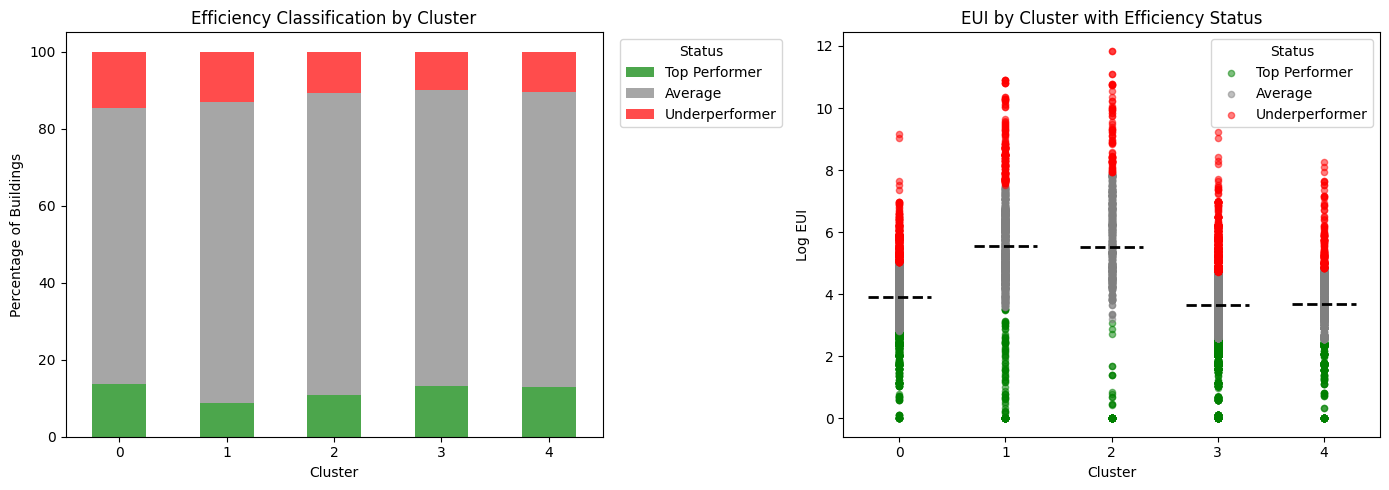

In [19]:
# Visualize efficiency classification
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart of efficiency status by cluster
efficiency_pct.plot(kind='bar', stacked=True, ax=axes[0], 
                    color=['green', 'gray', 'red'], alpha=0.7)
axes[0].set_title('Efficiency Classification by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Percentage of Buildings')
axes[0].legend(title='Status', bbox_to_anchor=(1.02, 1))
axes[0].tick_params(axis='x', rotation=0)

# Scatter plot: EUI vs cluster with color by efficiency status
colors = {'Top Performer': 'green', 'Average': 'gray', 'Underperformer': 'red'}
for status, color in colors.items():
    subset = df_viz[df_viz['efficiency_status'] == status]
    axes[1].scatter(subset['Cluster'], subset['log_eui'], 
                   c=color, label=status, alpha=0.5, s=20)

# Add cluster mean lines
for cluster in range(n_clusters):
    cluster_mean = df_viz[df_viz['Cluster'] == cluster]['log_eui'].mean()
    axes[1].hlines(cluster_mean, cluster - 0.3, cluster + 0.3, 
                  colors='black', linewidth=2, linestyles='--')

axes[1].set_title('EUI by Cluster with Efficiency Status')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Log EUI')
axes[1].legend(title='Status')

plt.tight_layout()
plt.show()

---
## 8. Cluster Profiles

Detailed profiles for each cluster showing building characteristics and EUI patterns.

In [20]:
# Generate detailed cluster profiles with EUI analysis
print("="*80)
print("CLUSTER PROFILES (PEER GROUPS)")
print("="*80)

for i in range(n_clusters):
    cluster_data = df_viz[df_viz['Cluster'] == i]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {i}: {len(cluster_data)} buildings ({len(cluster_data)/len(df_viz)*100:.1f}%)")
    print("="*80)
    
    # Building characteristics
    print("\n📋 BUILDING CHARACTERISTICS:")
    top_usage = cluster_data['primaryspaceusage'].value_counts().head(3)
    print(f"   Top building types: {', '.join(top_usage.index.tolist())}")
    
    top_meter = cluster_data['meter'].value_counts().head(3)
    print(f"   Top meter types: {', '.join(top_meter.index.tolist())}")
    
    top_region = cluster_data['region'].value_counts().head(2)
    print(f"   Top regions: {', '.join(top_region.index.tolist())}")
    
    print(f"   Avg Year Built: {cluster_data['yearbuilt'].mean():.0f}")
    print(f"   Avg Temperature: {cluster_data['Avg_AirTemp_Annual'].mean():.1f}°C")
    
    # EUI analysis within cluster
    print("\n⚡ EUI ANALYSIS (within this peer group):")
    print(f"   Mean Log EUI: {cluster_data['log_eui'].mean():.2f}")
    print(f"   Std Log EUI: {cluster_data['log_eui'].std():.2f}")
    print(f"   Range: {cluster_data['log_eui'].min():.2f} to {cluster_data['log_eui'].max():.2f}")
    
    # Efficiency breakdown
    eff_counts = cluster_data['efficiency_status'].value_counts()
    print("\n🎯 EFFICIENCY BREAKDOWN:")
    for status in ['Top Performer', 'Average', 'Underperformer']:
        count = eff_counts.get(status, 0)
        pct = count / len(cluster_data) * 100
        print(f"   {status}: {count} buildings ({pct:.1f}%)")

CLUSTER PROFILES (PEER GROUPS)

CLUSTER 0: 2976 buildings (21.5%)

📋 BUILDING CHARACTERISTICS:
   Top building types: Education, Entertainment/public assembly, Office
   Top meter types: electricity, gas, steam
   Top regions: Cardiff, Cymru / Wales, Town of Ithaca, New York
   Avg Year Built: 1969
   Avg Temperature: 11.2°C

⚡ EUI ANALYSIS (within this peer group):
   Mean Log EUI: 3.92
   Std Log EUI: 1.11
   Range: 0.00 to 9.16

🎯 EFFICIENCY BREAKDOWN:
   Top Performer: 410 buildings (13.8%)
   Average: 2131 buildings (71.6%)
   Underperformer: 435 buildings (14.6%)

CLUSTER 1: 1362 buildings (9.9%)

📋 BUILDING CHARACTERISTICS:
   Top building types: Education, Lodging/residential, Office
   Top meter types: electricity, water, chilledwater
   Top regions: Orlando, Florida, Tempe, Arizona
   Avg Year Built: 1993
   Avg Temperature: 23.1°C

⚡ EUI ANALYSIS (within this peer group):
   Mean Log EUI: 5.54
   Std Log EUI: 1.96
   Range: 0.00 to 10.90

🎯 EFFICIENCY BREAKDOWN:
   Top Perfo

---
## 8. Save Results

In [21]:
# Add cluster labels and efficiency status to original dataframe and save
df_with_clusters = df.copy()

# Need to align indices - only rows without missing values have clusters
df_with_clusters = df_with_clusters.dropna(subset=cat_features + num_features + ['log_eui'])
df_with_clusters['Cluster'] = clusters
df_with_clusters['efficiency_status'] = df_viz['efficiency_status'].values
df_with_clusters['eui_zscore'] = df_viz['eui_zscore'].values

# Save to CSV
output_path = "../data/df_analysis_with_clusters.csv"
df_with_clusters.to_csv(output_path, index=False)
print(f"Data with cluster labels and efficiency status saved to: {output_path}")
print(f"Total rows: {len(df_with_clusters)}")

# Summary of saved data
print("\n" + "-"*50)
print("Columns saved:")
print(df_with_clusters.columns.tolist())
print("\nNote: Building size (sqm, log_sqm) sourced from metadata_analysis.csv")

Data with cluster labels and efficiency status saved to: ../data/df_analysis_with_clusters.csv
Total rows: 13824

--------------------------------------------------
Columns saved:
['Avg_AirTemp_Annual', 'year', 'meter', 'site_id', 'region', 'country', 'yearbuilt', 'primaryspaceusage', 'total_meter_reading', 'eui', 'log_eui', 'sqm', 'log_sqm', 'Cluster', 'efficiency_status', 'eui_zscore']

Note: Building size (sqm, log_sqm) sourced from metadata_analysis.csv


---
## Summary

### Approach: Characteristic-Based Clustering (with Building Size)

K-Prototypes clustering on **building characteristics only** (excluding EUI):

**Clustering Features:**
- Building type (`primaryspaceusage`)
- Energy source (`meter`)
- Geographic location (`region`)
- Building age (`yearbuilt`)
- Climate (`Avg_AirTemp_Annual`)
- **Building size (`log_sqm`)** 

**Analysis Feature (NOT used for clustering):**
- Energy intensity (`log_eui`)

---

## Key Findings

### 1. Peer Groups Identified

Clusters are formed based on building type, region, climate, age, and **size from metadata**.

### 2. EUI Analysis Within Peer Groups

Building size is independent of energy data, so EUI analysis within clusters provides unbiased benchmarking.

### 3. Efficiency Classification

Buildings are classified as:
- **Top Performer**: EUI > 1 std below cluster mean
- **Average**: Within 1 std of cluster mean  
- **Underperformer**: EUI > 1 std above cluster mean

### 4. Practical Applications

| Application | How It Works |
|-------------|--------------|
| **Size-Fair Benchmarking** | Small buildings compared to small buildings |
| **Efficiency Scoring** | Z-score based on peer group performance |
| **Target Identification** | Focus on underperformers within their peer group |
| **Portfolio Segmentation** | Group by size + type + climate |

---

## Output Files

- **`df_analysis_with_clusters.csv`**: Original data with cluster labels, efficiency status, z-scores, and building size (`sqm`, `log_sqm`) added

---
## Appendix: Comparison — With vs Without Building Size

This section runs both clustering approaches to facilitate discussion:
1. **Without Size**: Cluster on `yearbuilt`, `Avg_AirTemp_Annual`, `primaryspaceusage`, `region`, `meter`
2. **With Size**: Same features + `log_sqm` (from metadata)

In [22]:
# ============================================================
# COMPARISON: Clustering WITH vs WITHOUT Building Size
# ============================================================

# Reload fresh data to run both versions
df_compare = pd.read_csv(path + "df_analysis.csv")
df_meta_compare = pd.read_csv(path + "metadata_analysis.csv")

# Merge to get sqm from metadata
merge_cols = ['site_id', 'primaryspaceusage', 'yearbuilt', 'region']
df_compare = df_compare.merge(
    df_meta_compare[['site_id', 'primaryspaceusage', 'yearbuilt', 'region', 'sqm']],
    on=merge_cols,
    how='left'
)

print(f"Loaded {len(df_compare)} rows for comparison")
print(f"Rows with sqm data: {df_compare['sqm'].notna().sum()}")

# Log-transform building size
df_compare['log_sqm'] = np.log(df_compare['sqm'])

# Define features for both approaches
cat_features_both = ['primaryspaceusage', 'region', 'meter']
num_features_no_size = ['yearbuilt', 'Avg_AirTemp_Annual']
num_features_with_size = ['yearbuilt', 'Avg_AirTemp_Annual', 'log_sqm']

# Prepare data - keep only rows valid for both analyses
cols_needed = cat_features_both + num_features_with_size + ['log_eui']
df_compare = df_compare[cols_needed].dropna()
print(f"Rows after cleaning: {len(df_compare)}")

Loaded 109303 rows for comparison
Rows with sqm data: 109303
Rows after cleaning: 13824


In [23]:
# ============================================================
# Run BOTH clustering approaches
# ============================================================

def run_kprototypes(df_input, num_features, cat_features, k=5, label=""):
    """Run K-Prototypes clustering and return results"""
    # Scale numerical features
    scaler = StandardScaler()
    df_scaled = df_input.copy()
    df_scaled[num_features] = scaler.fit_transform(df_input[num_features])
    
    # Prepare data
    feature_order = num_features + cat_features
    X = df_scaled[feature_order].values
    cat_indices = list(range(len(num_features), len(feature_order)))
    
    # Fit model
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    clusters = kproto.fit_predict(X, categorical=cat_indices)
    
    # Add cluster labels to original (unscaled) data
    df_result = df_input.copy()
    df_result['Cluster'] = clusters
    
    # Calculate EUI stats by cluster
    eui_stats = df_result.groupby('Cluster')['log_eui'].agg(['mean', 'std', 'count'])
    eui_stats.columns = ['mean_log_eui', 'std_log_eui', 'count']
    
    print(f"\n{'='*50}")
    print(f"Results: {label}")
    print(f"Features: {feature_order}")
    print(f"{'='*50}")
    print(eui_stats.round(3))
    
    return df_result, eui_stats, kproto

# Run WITHOUT size
df_no_size, stats_no_size, model_no_size = run_kprototypes(
    df_compare, num_features_no_size, cat_features_both, k=5, 
    label="WITHOUT Building Size"
)

# Run WITH size (from metadata)
df_with_size, stats_with_size, model_with_size = run_kprototypes(
    df_compare, num_features_with_size, cat_features_both, k=5, 
    label="WITH Building Size (from metadata)"
)


Results: WITHOUT Building Size
Features: ['yearbuilt', 'Avg_AirTemp_Annual', 'primaryspaceusage', 'region', 'meter']
         mean_log_eui  std_log_eui  count
Cluster                                  
0               3.466        1.080   5508
1               4.039        1.004   4319
2               5.212        2.154   1290
3               6.009        1.914    858
4               3.706        1.163   1849

Results: WITH Building Size (from metadata)
Features: ['yearbuilt', 'Avg_AirTemp_Annual', 'log_sqm', 'primaryspaceusage', 'region', 'meter']
         mean_log_eui  std_log_eui  count
Cluster                                  
0               3.921        1.112   2976
1               5.542        1.959   1362
2               5.523        2.373    742
3               3.648        1.071   7035
4               3.681        1.168   1709

Results: WITH Building Size (from metadata)
Features: ['yearbuilt', 'Avg_AirTemp_Annual', 'log_sqm', 'primaryspaceusage', 'region', 'meter']
         m

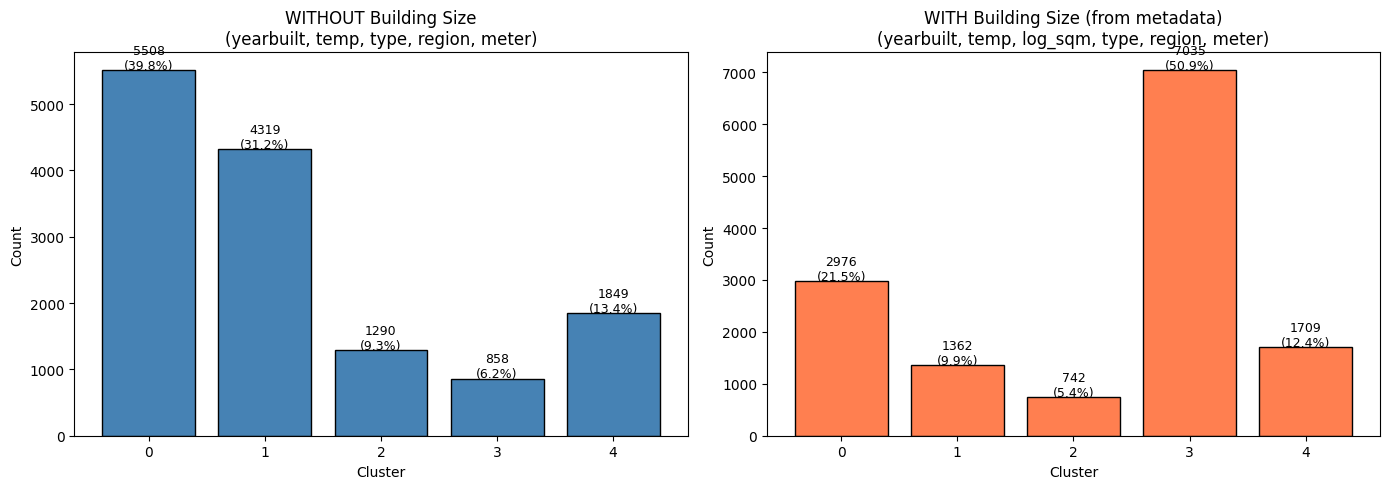


Cluster Distribution Comparison:
--------------------------------------------------
Cluster    Without Size         With Size (metadata)
--------------------------------------------------
0           5508 ( 39.8%)        2976 ( 21.5%)
1           4319 ( 31.2%)        1362 (  9.9%)
2           1290 (  9.3%)         742 (  5.4%)
3            858 (  6.2%)        7035 ( 50.9%)
4           1849 ( 13.4%)        1709 ( 12.4%)


In [24]:
# ============================================================
# Compare cluster distributions
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Without size
cluster_counts_no = df_no_size['Cluster'].value_counts().sort_index()
axes[0].bar(cluster_counts_no.index, cluster_counts_no.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')
axes[0].set_title('WITHOUT Building Size\n(yearbuilt, temp, type, region, meter)')
for i, v in enumerate(cluster_counts_no.values):
    pct = v / len(df_no_size) * 100
    axes[0].text(i, v + 20, f'{v}\n({pct:.1f}%)', ha='center', fontsize=9)

# With size (from metadata)
cluster_counts_with = df_with_size['Cluster'].value_counts().sort_index()
axes[1].bar(cluster_counts_with.index, cluster_counts_with.values, color='coral', edgecolor='black')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('WITH Building Size (from metadata)\n(yearbuilt, temp, log_sqm, type, region, meter)')
for i, v in enumerate(cluster_counts_with.values):
    pct = v / len(df_with_size) * 100
    axes[1].text(i, v + 20, f'{v}\n({pct:.1f}%)', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print distribution comparison
print("\nCluster Distribution Comparison:")
print("-" * 50)
print(f"{'Cluster':<10} {'Without Size':<20} {'With Size (metadata)':<20}")
print("-" * 50)
for i in range(5):
    no_pct = cluster_counts_no.get(i, 0) / len(df_no_size) * 100
    with_pct = cluster_counts_with.get(i, 0) / len(df_with_size) * 100
    print(f"{i:<10} {cluster_counts_no.get(i, 0):>5} ({no_pct:>5.1f}%)       {cluster_counts_with.get(i, 0):>5} ({with_pct:>5.1f}%)")

In [25]:
# ============================================================
# Compare EUI variation WITHIN clusters (key metric!)
# ============================================================

# Lower std dev = more homogeneous peer group = better for fair comparison
comparison_df = pd.DataFrame({
    'Without Size - Mean EUI': stats_no_size['mean_log_eui'],
    'Without Size - Std Dev': stats_no_size['std_log_eui'],
    'With Size - Mean EUI': stats_with_size['mean_log_eui'],
    'With Size - Std Dev': stats_with_size['std_log_eui'],
})

print("EUI Statistics Comparison by Cluster:")
print("=" * 70)
print(comparison_df.round(3))
print("=" * 70)

# Overall comparison
avg_std_no_size = stats_no_size['std_log_eui'].mean()
avg_std_with_size = stats_with_size['std_log_eui'].mean()

print(f"\nAverage within-cluster EUI std dev:")
print(f"  WITHOUT size: {avg_std_no_size:.3f}")
print(f"  WITH size:    {avg_std_with_size:.3f}")
print(f"  Difference:   {avg_std_with_size - avg_std_no_size:+.3f}")

if avg_std_with_size < avg_std_no_size:
    print("\n→ Adding size REDUCES EUI variation within clusters (more homogeneous)")
else:
    print("\n→ Adding size INCREASES EUI variation within clusters (less homogeneous)")

EUI Statistics Comparison by Cluster:
         Without Size - Mean EUI  Without Size - Std Dev  \
Cluster                                                    
0                          3.466                   1.080   
1                          4.039                   1.004   
2                          5.212                   2.154   
3                          6.009                   1.914   
4                          3.706                   1.163   

         With Size - Mean EUI  With Size - Std Dev  
Cluster                                             
0                       3.921                1.112  
1                       5.542                1.959  
2                       5.523                2.373  
3                       3.648                1.071  
4                       3.681                1.168  

Average within-cluster EUI std dev:
  WITHOUT size: 1.463
  WITH size:    1.537
  Difference:   +0.074

→ Adding size INCREASES EUI variation within clusters (less homog

In [26]:
# ============================================================
# Check building SIZE variation within clusters
# ============================================================

# Add size info to both dataframes (they have same rows, just different cluster assignments)
df_no_size['log_sqm'] = df_compare['log_sqm'].values
df_with_size['log_sqm'] = df_compare['log_sqm'].values

# Calculate size variation within clusters for BOTH approaches
size_stats_no = df_no_size.groupby('Cluster')['log_sqm'].agg(['mean', 'std'])
size_stats_with = df_with_size.groupby('Cluster')['log_sqm'].agg(['mean', 'std'])

print("Building Size (log_sqm from metadata) Variation WITHIN Clusters:")
print("=" * 60)
print(f"\nWITHOUT Size as Feature:")
print(size_stats_no.round(3))
print(f"\nAvg within-cluster size std: {size_stats_no['std'].mean():.3f}")

print(f"\nWITH Size as Feature (from metadata):")
print(size_stats_with.round(3))
print(f"\nAvg within-cluster size std: {size_stats_with['std'].mean():.3f}")

# Interpretation
print("\n" + "=" * 60)
print("INTERPRETATION:")
print("=" * 60)
if size_stats_with['std'].mean() < size_stats_no['std'].mean():
    print("✓ Adding size creates more SIZE-HOMOGENEOUS clusters")
    print("  (buildings within same cluster have similar sizes)")
else:
    print("✗ Adding size does NOT reduce size variation within clusters")

Building Size (log_sqm from metadata) Variation WITHIN Clusters:

WITHOUT Size as Feature:
          mean    std
Cluster              
0        7.962  0.943
1        7.908  0.905
2        8.302  1.271
3        8.452  1.088
4        7.963  0.769

Avg within-cluster size std: 0.995

WITH Size as Feature (from metadata):
          mean    std
Cluster              
0        9.170  0.464
1        9.082  0.677
2        7.080  0.840
3        7.445  0.538
4        7.844  0.613

Avg within-cluster size std: 0.626

INTERPRETATION:
✓ Adding size creates more SIZE-HOMOGENEOUS clusters
  (buildings within same cluster have similar sizes)


### Discussion Points

**Arguments FOR including building size:**
1. Creates more size-homogeneous peer groups
2. Different building sizes have different operational characteristics

**Arguments AGAINST including building size:**
1. EUI already normalizes for size by definition (EUI = Energy / Area)
2. Philosophy of EUI: allows comparing buildings of different sizes
3. If we cluster by size, we lose the ability to ask "is a small building inherently more/less efficient than a large one?"

**Key questions to discuss:**
- Should peer groups be size-homogeneous, or is EUI comparison across sizes valid?

**Including size as a clustering feature: Yes or NO** 
- The choice depends on the benchmarking "philosophy": whether size-homogeneous peer groups are preferred over leveraging EUI's built-in size normalization.